# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import pandas_profiling
from sklearn import svm

In [2]:
data = pd.read_csv('Diabetes.csv.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA

In [4]:
df=pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df=df.drop(['SkinThickness'],axis=1)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#sns.pairplot(df)

In [10]:
#sns.pairplot(df,hue='Outcome')

# Train Test Split

In [11]:
x=df.drop(['Outcome'],axis=1)

In [12]:
y=df['Outcome']

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.3, random_state=132)

# Linear Regression

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [16]:
y_pred=lr.predict(xtest)

In [17]:
accuracy = r2_score(ytest,y_pred)

In [18]:
accuracy

0.24560609298458502

# Naive Bayes Guassian

In [19]:
gaussian=GaussianNB()

In [20]:
gaussian.fit(xtrain,ytrain)

GaussianNB()

In [21]:
print("Naive Bayes score: ",gaussian.score(xtest,ytest))

Naive Bayes score:  0.7142857142857143


# Decision Tree

In [22]:
model=DecisionTreeClassifier(criterion='gini',max_depth=40,random_state=0)


In [23]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=40, random_state=0)

In [24]:
y_model_pred=model.predict(xtest)

In [25]:
y_pred_train_model=model.predict(xtrain)
y_pred_train_model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [26]:
print('model accuracy score with criterion gini Index : {0:0.4f}'.format(accuracy_score(ytest,y_model_pred)))

model accuracy score with criterion gini Index : 0.7056


In [27]:
print('Test set score: {:.4f}'.format(model.score(xtest, ytest)))

Test set score: 0.7056


# Random Forest

In [28]:
model=RandomForestClassifier(n_estimators=100,random_state=0)


In [29]:
model.fit(xtrain,ytrain)


RandomForestClassifier(random_state=0)

In [30]:
y_pred=model.predict(xtest)


In [31]:
print('Model accuracy score with 10 decision trees :{0:0.4f}'.format(accuracy_score(ytest,y_pred)))

Model accuracy score with 10 decision trees :0.7446


# PCA + Logistic Regression

In [32]:
scaler = StandardScaler()


In [33]:
xtrain = pd.DataFrame(scaler.fit_transform(xtrain), columns = x.columns)


In [34]:
xtest = pd.DataFrame(scaler.transform(xtest), columns = x.columns)

In [35]:
logreg = LogisticRegression()


In [36]:
logreg.fit(xtrain, ytrain)


LogisticRegression()

In [37]:
y_pred = logreg.predict(xtest)

In [38]:
print('Logistic Regression accuracy score with all the features:\n {0:0.4f}'. format(accuracy_score(ytest, y_pred)))

Logistic Regression accuracy score with all the features:
 0.7489


# KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [41]:
predknn = knn.predict(xtest)

In [42]:
print(confusion_matrix(ytest,predknn))

[[117  33]
 [ 41  40]]


In [43]:
print(classification_report(ytest,predknn))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       150
           1       0.55      0.49      0.52        81

    accuracy                           0.68       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.68      0.68       231



In [44]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

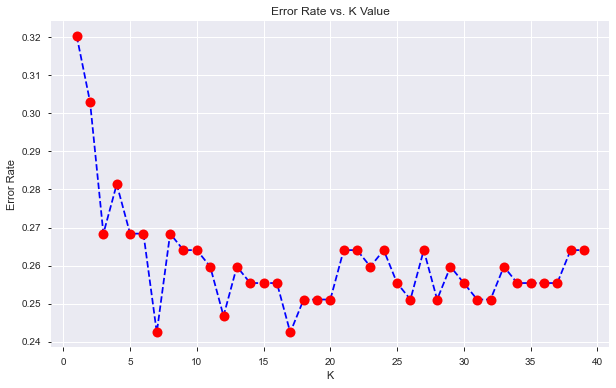

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
# NOW WITH K=36
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(xtrain,ytrain)
predknn2 = knn.predict(xtest)

print('WITH K=36')
print('\n')
print(confusion_matrix(ytest,predknn2))
print('\n')
print(classification_report(ytest,predknn2))

WITH K=36


[[142   8]
 [ 51  30]]


              precision    recall  f1-score   support

           0       0.74      0.95      0.83       150
           1       0.79      0.37      0.50        81

    accuracy                           0.74       231
   macro avg       0.76      0.66      0.67       231
weighted avg       0.75      0.74      0.71       231



# SVM

In [47]:
profile = data.profile_report(title='Diabetes Profiling Report')
profile

In [48]:
X = df.iloc[:, :7]
X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


In [49]:
y = df["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
    
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 7)
(576,)
(192, 7)
(192,)


In [51]:
# Normalize Features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [52]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.765625
poly
0.78125
rbf
0.8211805555555556
sigmoid
0.6527777777777778


In [53]:
# Using the best model
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [54]:
patient = np.array([[ 1., 150., 70., 45., 40., 1.5, 25]])
    
# Normalize the data with the values used in the training set
patient = scaler.transform(patient)
print(patient)    
predbest=model.predict(patient)
predbest[0]

[[-0.82986389  0.91063462  0.0166341  -0.33430854  0.97958623  3.10583154
  -0.71570071]]


1

In [55]:
# Accuracy on Testing Set
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.78125


In [56]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.91      0.85       130
           1       0.73      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.76      0.71      0.73       192
weighted avg       0.77      0.78      0.77       192

